# Simulation of Linear Dynamical Systems

## Linear time invariant systems
To simulate the solution of a continuous-time linear dynamical system given the system matrix $A$ and initial condition $x_0$:

$\dot{x} = Ax, x(0) = x_0, $

We will use the matrix exponential formula to compute the state transition matrix and then use it to evolve the system over time. 



In [1]:
def linear_ode(A):
    import numpy as np
    from scipy.linalg import expm
    #from numpy.linalg import eig
    from numpy import linalg as eigen

    # Define the system matrix A

    # Define the time step and simulation duration
    dt = 0.01  # Time step
    T = 6.0    # Total simulation time
    num_steps = int(T / dt)

    # Initial state
    x0 = np.array([1, 1])


    # Compute the matrix exponential of A
    exp_A = expm(A*dt)

    # Simulate the system over time
    state_history = [x0]
    for _ in range(num_steps):
        # use exp_A and x[k] to predict the x[k+1]
        x_next = np.matmul(exp_A,x0) 
        x0= x_next
        state_history.append(x_next)

    # Extract x and y coordinates for the phase portrait
    x1_vals = [x[0] for x in state_history]
    x2_vals = [x[1] for x in state_history]

    # Compute continuous-time eigenvalues
    continuous_eigenvalues, _ = eigen.eig(A) 

    # Compute discretized eigenvalues
    discretized_eigenvalues, _ = eigen.eig(exp_A) 

    return continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals

## Unstable
The system matrix $A$ is given by:

$
A = \begin{bmatrix}
1 & 2 \\
-2 & 1 \\
\end{bmatrix}.
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 1 \cdot x_1 + 2 \cdot x_2 \\
\frac{dx_2}{dt} &= -2 \cdot x_1 + 1 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.


Continuous-time eigenvalues: [1.+2.j 1.-2.j]
Discretized eigenvalues: [1.00984816+0.02019966j 1.00984816-0.02019966j]


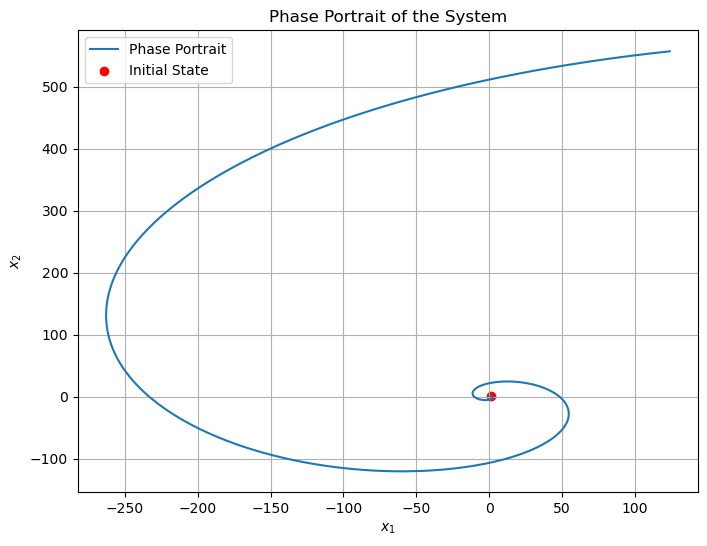

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[1, 2],
              [-2, 1]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Stable
The system matrix $A$ is given by:

$
A = \begin{bmatrix}
0 & 1 \\
-1 & -1 \\
\end{bmatrix}
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 0 \cdot x_1 + 1 \cdot x_2 \\
\frac{dx_2}{dt} &= -1 \cdot x_1 - 1 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.

Continuous-time eigenvalues: [-0.5+0.8660254j -0.5-0.8660254j]
Discretized eigenvalues: [0.99497517+0.00861695j 0.99497517-0.00861695j]


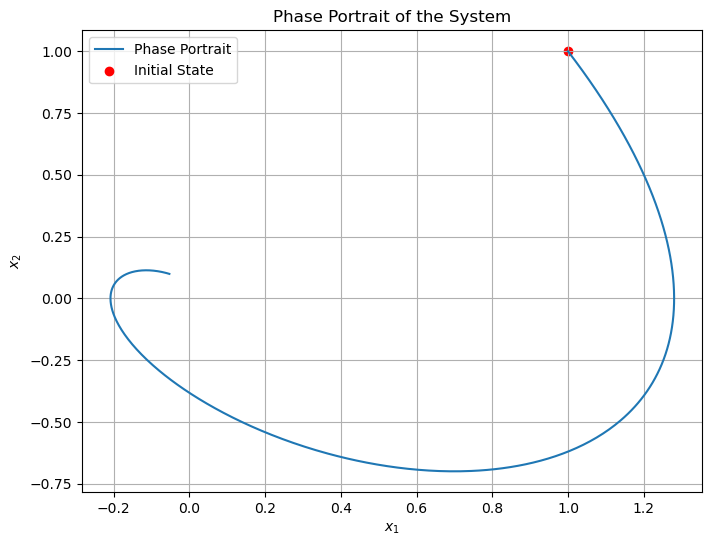

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[0, 1],
              [-1, -1]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Limit Cycle
A limit cycle is a closed trajectory in a phase space that a dynamical system approaches and repeats over time.

The system matrix $A$ is given by:

$
A = \begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}.
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 0 \cdot x_1 + 1 \cdot x_2 \\
\frac{dx_2}{dt} &= -1 \cdot x_1 + 0 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.

Continuous-time eigenvalues: [0.+1.j 0.-1.j]
Discretized eigenvalues: [0.99995+0.00999983j 0.99995-0.00999983j]


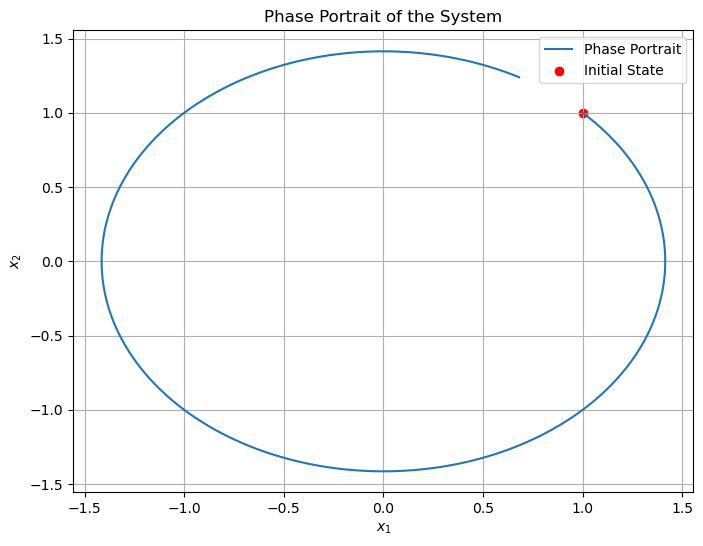

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[0, 1],
              [-1, 0]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Summary: Comparison of Unstable, Stable, and Limit Cycle Behaviors

### 1. Unstable Behavior
- **System Matrix:** $A = \begin{bmatrix} 1 & 2 \\ -2 & 1 \end{bmatrix}$
- **Description:** This case illustrates an unstable behavior. The eigenvalues of the system matrix have a positive real part and complex conjugate imaginary parts. As a result, the system exhibits an outward spiral trajectory in the phase portrait, indicating divergence away from the origin over time.

### 2. Stable Linear Behavior
- **System Matrix:** $A = \begin{bmatrix} -1 & -2 \\ -2 & 0 \end{bmatrix}$
- **Description:** This example demonstrates stable behavior. The system matrix possesses eigenvalues with negative real parts, implying convergence to the origin. The phase portrait depicts a linear trajectory that converges toward the origin, representing a stable equilibrium point.

### 3. Limit Cycle Behavior
- **System Matrix:** $A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$
- **Description:** In this scenario, the system exhibits limit cycle behavior. The system matrix's purely imaginary eigenvalues lead to a closed trajectory in the phase space. The state variables undergo circular motion, forming a stable closed loop that repeats periodically.

These examples demonstrate various behaviors displayed by linear dynamical systems, influenced by the eigenvalues of their system matrices. The eigenvalues fundamentally shape the system's dynamics and stability.


# Task 2: Simulation of Nonlinear System

## Kinematic point car model (bicycle model)

The kinematic point car model is a simple representation for a vehicle kinematics at low speed, which can be expressed as follows with the variables:

$p_1, p_2$ : The position of the car in the global frame. Assume $x$ axis is the forward direction.

$v$ : The speed of the car along its longitudinal (forward) direction.

$\psi$ : The heading direction (yaw rate) of the car.

$\delta$ : The steering angle.

$a$ : linear acceleration.

$L$ : The wheelbase of the car (distance between the front and rear axles).

The equations of the bicycle model are given by:


\begin{align*}
\dot{p}_1 &= v \cos(\psi) \\
\dot{p}_2 &= v \sin(\psi) \\
\dot{\psi} &= \frac{v}{L} \tan(\delta) \\
\dot{v} &= a \\
\end{align*}

In the state space form, the model can be written as:

\begin{align*}
\dot{x} &= f(x, u)\\
\text{where,}\\
x &= [p_1, p_2, \psi, v]^T\\
u &= [\delta, a]\\
f(x,u) &= [\dot{p}_1, \dot{p}_2, \dot{\psi}, \dot{v}]^T\\
&= [v \cdot \cos(\psi), v \cdot \sin(\psi), \frac{v}{L} \cdot \tan(\delta), a]^T
\end{align*}

where $x = [p_1, p_2, \psi, v]^T$ is the state vector, $u = [\delta, a]$ is the control input vector, and $f(x, u) = [\dot{p}_1, \dot{p}_2, \dot{\psi}, \dot{v}]^T = [v \cdot \cos(\psi), v \cdot \sin(\psi), \frac{v}{L} \cdot \tan(\delta), a]^T$ is the system dynamics function.

Note: The dot above the variable denotes the derivative with respect to time, and $(\cdot)^T$ is the transpose of a vector.



In [5]:
def sim_car():
    import numpy as np
    from scipy.integrate import solve_ivp
    # Constants
    L = 2  # Length from front to rear axle

    # System dynamics
    def car_model(t, y, u):
        p1, p2, psi, v = y
        delta, a = u
        dp1_dt = v*np.cos(psi) 
        dp2_dt = v*np.sin(psi) 
        dpsi_dt =(v*np.tan(delta))/L 
        dv_dt = a 
        return [dp1_dt, dp2_dt, dpsi_dt, dv_dt]
    
    # Initial state
    y0 = [0, 0, 0, 1]   # [x, y, psi, v]
    # Control inputs
    u = [0.1, 0.1]     # [delta, a]

    # Integrate system dynamics
    t_span = [0, 10] # 10 seconds
    # Time points for evaluation (t_eval)
    t_eval = np.arange(0, 10, 0.01)
    sol = solve_ivp(lambda t, y: car_model(t, y, u), t_span, y0, t_eval=t_eval)

    return sol

def sim_car_control():
    import numpy as np
    from scipy.integrate import solve_ivp
    # Constants
    L = 2  # Length from front to rear axle

    # System dynamics
    def car_model(t, y, delta_func, a_func):
        p1, p2, psi, v = y
        delta = delta_func(t) 
        a = a_func(t) 
        dp1_dt = v*np.cos(psi)
        dp2_dt = v*np.sin(psi) 
        dpsi_dt = v/L *np.tan(delta)
        dv_dt = a 
        return [dp1_dt, dp2_dt, dpsi_dt, dv_dt]

    # Initial state
    y0 = [0, 0, 0, 1]   # [x, y, psi, v]

    # Periodic control inputs
    def periodic_delta(t):
        return 0.1 * np.sin(0.5 * t)

    def periodic_a(t):
        return 0.1 * np.cos(0.25 * t)

    # Integrate system dynamics
    t_span = [0, 20]  # 20 seconds
    # Time points for evaluation (t_eval)
    t_eval = np.arange(0, 20, 0.01)
    sol = solve_ivp(lambda t, y: car_model(t, y, periodic_delta ,periodic_a), t_span, y0, t_eval=t_eval)

    return sol

def sim_car_euler():
    import numpy as np
    # Constants
    L = 2  # Length from front to rear axle
    dt = 0.01  # Time step

    # System dynamics
    def car_model(y, delta, a):
        p1, p2, psi, v = y
        dp1_dt = v*np.cos(psi) 
        dp2_dt = v*np.sin(psi) 
        dpsi_dt = v/L *np.tan(delta)
        dv_dt = a 
        return [dp1_dt, dp2_dt, dpsi_dt, dv_dt]

    # Periodic control inputs
    def periodic_delta(t):
        return 0.1 * np.sin(0.5 * t)

    def periodic_a(t):
        return 0.1 * np.cos(0.25 * t)

    # Initial state
    y = np.array([0, 0, 0, 1])  # [x, y, psi, v]

    # Simulation
    t_max = 20
    num_steps = int(t_max / dt)
    results = np.zeros((num_steps, 4))
    time = np.zeros(num_steps)

    for i in range(num_steps):
        delta = periodic_delta(i * dt)
        a = periodic_a(i * dt)
        results[i] = y
        time[i] = i * dt
        # predict the next state using explicit Euler integration scheme
        q=car_model(y,delta,a)
        y = y+np.multiply(q,dt).astype(float) 

    return time, results

## ODE solver with constant control input

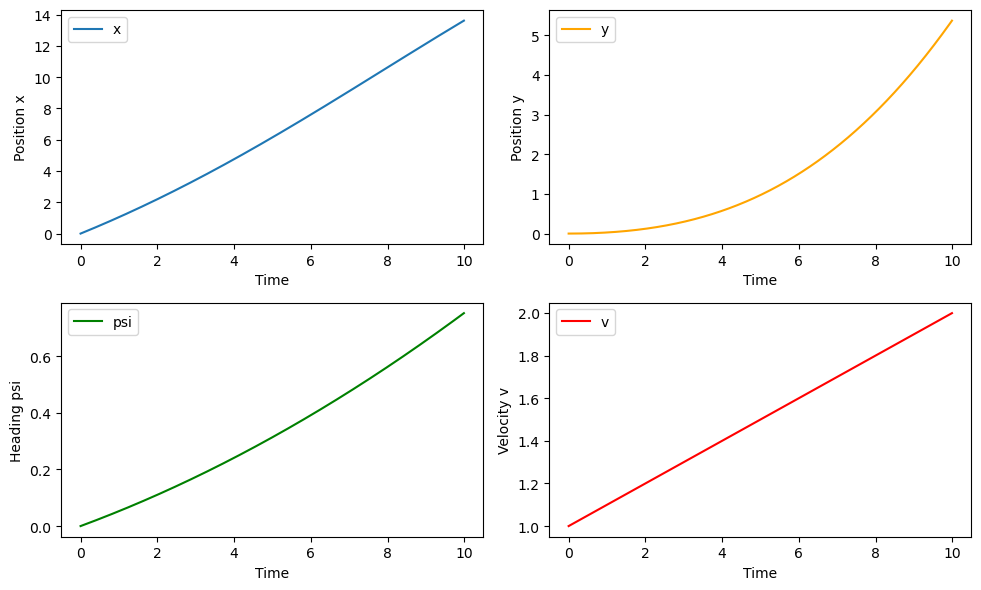

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = sim_car()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()

## ODE solver with time-varying control input

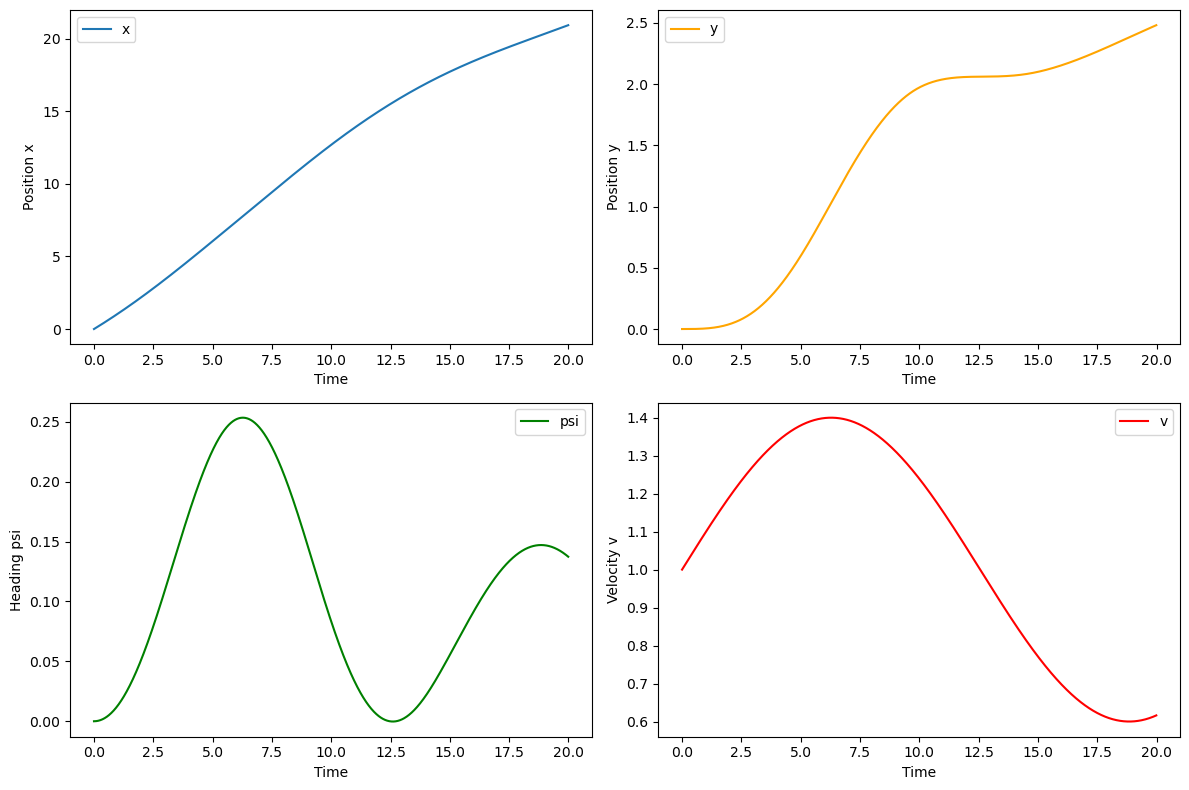

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = sim_car_control()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()

## Euler first-order integration with time-varying control input

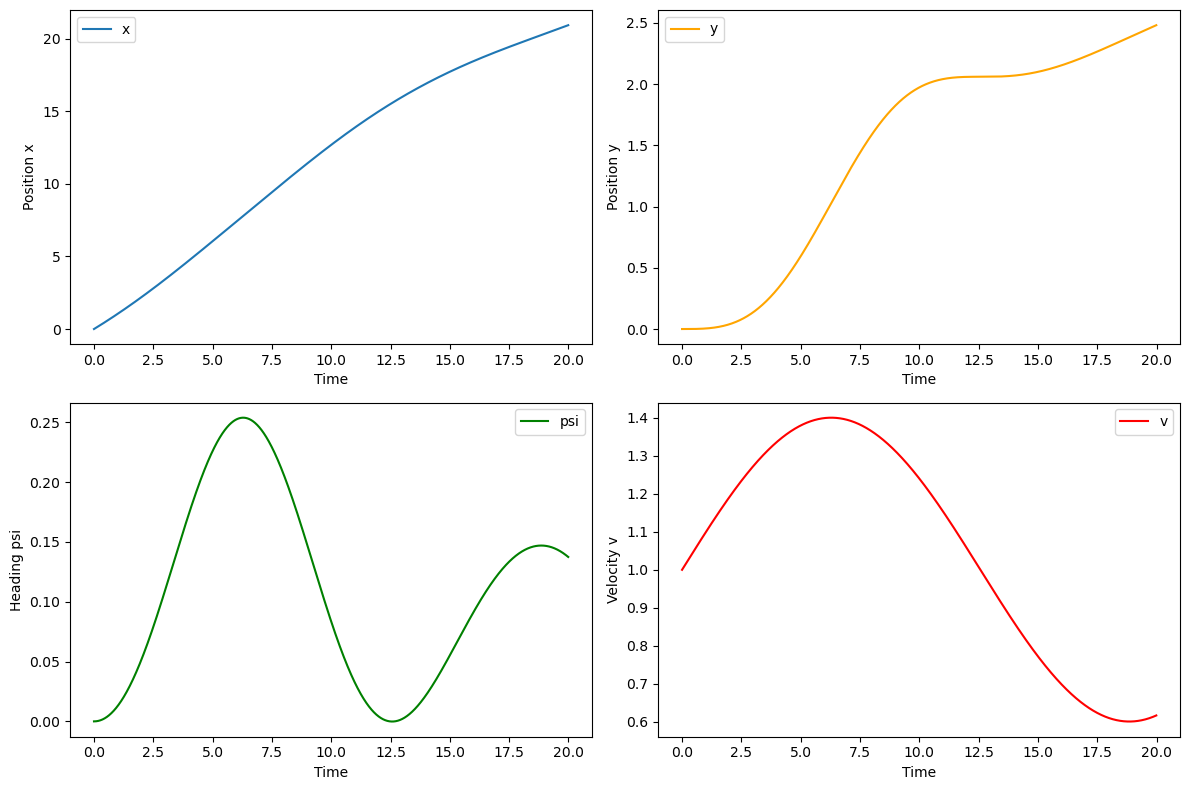

In [8]:
import numpy as np
import matplotlib.pyplot as plt

time, results =  sim_car_euler()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, results[:, 0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time, results[:, 1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time, results[:, 2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time, results[:, 3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()